Develop a model to predict customer churn for a bank using historical customer data ,including features like their age , their monthly salary , their balance etc.   

In [33]:
import pandas as pd
import numpy as np

In [34]:
import warnings
warnings.filterwarnings('ignore')

Loading data

In [35]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [36]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1 , inplace =True)

EDA(Exploratory Data Analysis)

In [37]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5138,850,France,Male,34,6,0.00,1,0,1,52796.31,0
8442,598,France,Female,34,4,0.00,2,0,0,60894.26,0
2785,640,France,Male,43,7,132412.38,1,0,0,69584.30,1
5643,616,Spain,Female,36,6,0.00,1,1,1,12916.32,1
5289,613,Spain,Male,19,5,0.00,1,1,1,176903.35,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [39]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [44]:
df['Exited'].value_counts().unique()

array([7963, 2037], dtype=int64)

Data Visualisation

In [45]:
import seaborn as sns 
sns.set_style('whitegrid')
import matplotlib.pyplot as plt 
%matplotlib inline


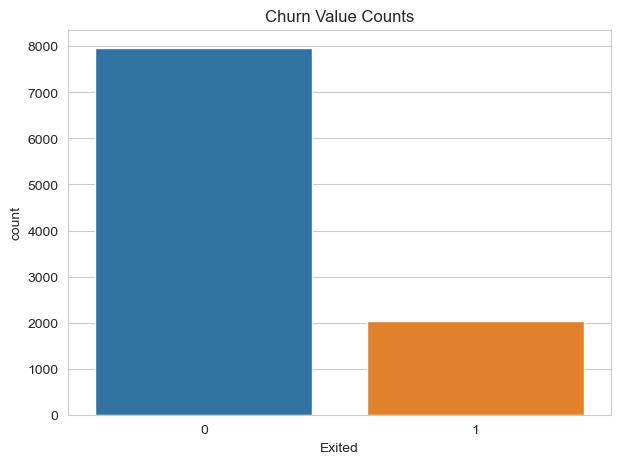

In [46]:
plt.figure(figsize=(7,5))
sns.countplot(data= df , x = 'Exited')
plt.title('Churn Value Counts')
plt.show()

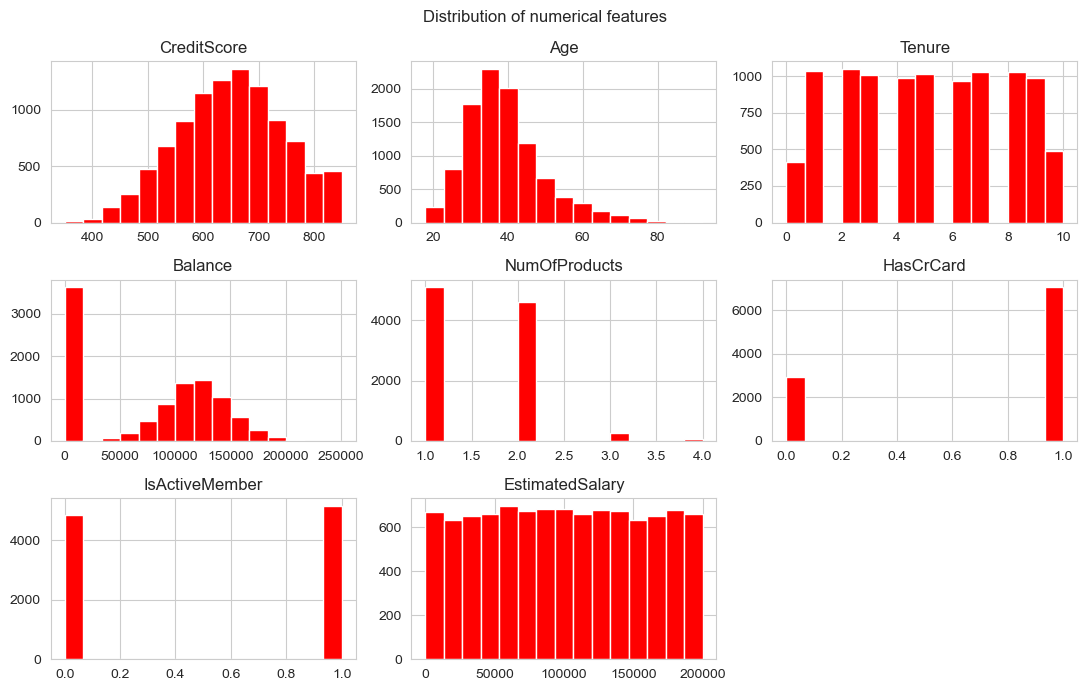

In [47]:
num_features = [ 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
df[num_features].hist(bins=15, figsize=(11, 7) , color = 'red')
plt.suptitle('Distribution of numerical features')
plt.tight_layout()
plt.show()

Scaling the columns

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols =['CreditScore' , 'Age' ,'Tenure', 'Balance','NumOfProducts' , 'EstimatedSalary']

df[cols] = scaler.fit_transform(df[cols])

In [49]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3337,0.458,Spain,Male,0.513514,0.4,0.395941,0.000000,0,0,0.022563,1
9241,0.318,France,Male,0.229730,0.8,0.000000,0.333333,0,1,0.337131,0
3880,0.654,France,Female,0.729730,0.8,0.000000,0.333333,1,1,0.768038,0
6944,1.000,Germany,Male,0.243243,0.7,0.409731,0.000000,1,1,0.436746,0
8938,0.686,Spain,Male,0.391892,0.8,0.428878,0.000000,1,1,0.400727,0


In [50]:
df['Gender'].replace({'Female' : 1 , "Male" : 0 },inplace=True)

In [51]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4837,0.906,France,0,0.135135,0.3,0.000000,0.333333,1,0,0.798288,0
6470,0.466,Germany,1,0.310811,0.5,0.309479,0.000000,1,0,0.952181,0
4324,0.278,France,0,0.216216,0.5,0.000000,0.000000,0,0,0.217666,0
6975,0.412,Spain,0,0.270270,0.2,0.460199,0.000000,1,0,0.753412,0
1585,0.376,France,0,0.202703,0.6,0.373823,0.000000,1,1,0.996284,0


One Hot Encoding

In [52]:
df = pd.get_dummies(data=df , columns=['Geography'] , drop_first= True )

In [53]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
2423,0.624,1,0.148649,1.0,0.000000,0.333333,1,0,0.687549,0,0,0
5178,1.000,0,0.054054,0.7,0.364931,0.333333,0,0,0.052654,0,1,0
4464,0.582,0,0.310811,0.6,0.000000,0.333333,1,0,0.326957,0,0,0
9394,0.494,1,0.229730,0.8,0.522527,0.000000,1,1,0.964298,0,1,0
4032,0.160,0,0.270270,0.9,0.000000,0.333333,1,1,0.060202,0,0,0


In [54]:
y = df['Exited']
x = df.drop('Exited' , axis =1)

Importing models and fitting them 


In [67]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

from sklearn.svm import SVC
svc = SVC()

from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()

from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)



In [56]:
import numpy as np 

score_1 = cross_val_score(lr,x,y,cv=3)
np.average(score_1)

0.8101997962243734

In [57]:
score_2 = cross_val_score(rf,x,y,cv=3)
np.average(score_2)

0.8637994273332552

In [58]:
score_3 = cross_val_score(svc,x,y,cv=3)
np.average(score_3)

0.8407002067933247

In [59]:
score_4 = cross_val_score(mb,x,y,cv=3)
np.average(score_4)

0.7962999959264073

In [65]:
score_5 = cross_val_score(gb,x,y,cv=3)
np.average(score_5)

0.8244998765023474

In [66]:
score_6 = cross_val_score(dc,x,y,cv=3)
np.average(score_6)

0.7911001358084219

In [68]:
score_7 = cross_val_score(knn,x,y,cv=3)
np.average(score_7)

0.8084000061673834

So ,We can see that out of the 4 models , random forest classifier model performs the best

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Predicting through Random Forest classifier


In [70]:
rf.fit(X_train,y_train)
y_predicted = rf.predict(X_test)
rf.predict_proba(X_test)

array([[0.99, 0.01],
       [0.97, 0.03],
       [0.69, 0.31],
       ...,
       [0.3 , 0.7 ],
       [0.93, 0.07],
       [0.53, 0.47]])

In [71]:
rf.score(X_test,y_test)

0.8705

In [62]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_predicted)

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



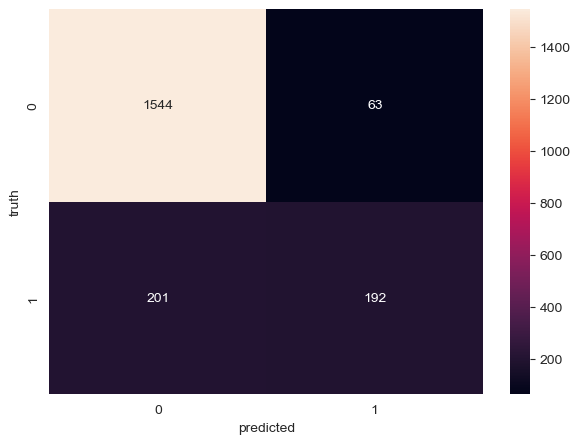

In [63]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()